In [1]:
# get the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Ireland_Housing.csv')

In [3]:
data

,Statistic,Year,Dwelling Status,Stamp Duty Event,RPPI Region,Type of Buyer,UNIT,VALUE
0,Volume of Sales,2010,All Dwelling Statuses,Filings,All,All Buyer Types,Number,19302
1,Volume of Sales,2010,All Dwelling Statuses,Filings,All,Household Buyer - First-Time Buyer Owner-Occupier,Number,10434
2,Volume of Sales,2010,All Dwelling Statuses,Filings,All,Household Buyer - Former Owner-Occupier,Number,6237
3,Volume of Sales,2010,All Dwelling Statuses,Filings,All,Household Buyer - Non-Occupier,Number,2631
4,Volume of Sales,2010,All Dwelling Statuses,Filings,Border Excluding Louth,All Buyer Types,Number,1465
...,...,...,...,...,...,...,...,...
12091,Volume of Sales,2021,Existing,Executions,Cork County,Household Buyer - Non-Occupier,Number,521
12092,Volume of Sales,2021,Existing,Executions,Kerry,All Buyer Types,Number,1162
12093,Volume of Sales,2021,Existing,Executions,Kerry,Household Buyer - First-Time Buyer Owner-Occupier,Number,217
12094,Volume of Sales,2021,Existing,Executions,Kerry,Household Buyer - Former Owner-Occupier,Number,628


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12096 entries, 0 to 12095
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Statistic         12096 non-null  object
 1   Year              12096 non-null  int64 
 2   Dwelling Status   12096 non-null  object
 3   Stamp Duty Event  12096 non-null  object
 4   RPPI Region       12096 non-null  object
 5   Type of Buyer     12096 non-null  object
 6   UNIT              12096 non-null  object
 7   VALUE             12096 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 756.1+ KB


In [5]:
# Descriptive statistics before removing 'All' rows
data.describe()

,Year,VALUE
count,12096.000000,12096.000000
mean,2015.500000,816.877976
std,3.452195,2632.004327
min,2010.000000,0.000000
25%,2012.750000,73.000000
50%,2015.500000,215.000000
75%,2018.250000,625.000000
max,2021.000000,46419.000000


In [6]:
data = data[~data['RPPI Region'].isin(['All'])]
data = data[~data['Type of Buyer'].isin(['All Buyer Types'])]
data = data[~data['Dwelling Status'].isin(['All Dwelling Statuses'])]

In [7]:
# Descriptive statistics after removing 'All' rows
data.describe()

,Year,VALUE
count,5904.000000,5904.000000
mean,2015.500000,278.933943
std,3.452345,523.761126
min,2010.000000,0.000000
25%,2012.750000,31.000000
50%,2015.500000,106.000000
75%,2018.250000,282.000000
max,2021.000000,6399.000000


In [8]:
avg = data.mean()
avg

Year     2015.500000
VALUE     278.933943
dtype: float64

In [9]:
med = data.median()
med

Year     2015.5
VALUE     106.0
dtype: float64

In [10]:
standard = data.std()
standard

Year       3.452345
VALUE    523.761126
dtype: float64

In [11]:
data

,Statistic,Year,Dwelling Status,Stamp Duty Event,RPPI Region,Type of Buyer,UNIT,VALUE
341,Volume of Sales,2010,New,Filings,Border Excluding Louth,Household Buyer - First-Time Buyer Owner-Occupier,Number,313
342,Volume of Sales,2010,New,Filings,Border Excluding Louth,Household Buyer - Former Owner-Occupier,Number,218
343,Volume of Sales,2010,New,Filings,Border Excluding Louth,Household Buyer - Non-Occupier,Number,153
345,Volume of Sales,2010,New,Filings,Cavan,Household Buyer - First-Time Buyer Owner-Occupier,Number,83
346,Volume of Sales,2010,New,Filings,Cavan,Household Buyer - Former Owner-Occupier,Number,77
...,...,...,...,...,...,...,...,...
12090,Volume of Sales,2021,Existing,Executions,Cork County,Household Buyer - Former Owner-Occupier,Number,1797
12091,Volume of Sales,2021,Existing,Executions,Cork County,Household Buyer - Non-Occupier,Number,521
12093,Volume of Sales,2021,Existing,Executions,Kerry,Household Buyer - First-Time Buyer Owner-Occupier,Number,217
12094,Volume of Sales,2021,Existing,Executions,Kerry,Household Buyer - Former Owner-Occupier,Number,628


In [12]:
data = data.drop('Statistic', 1)
data = data.drop('UNIT', 1)

In [13]:
data.head(10)

,Year,Dwelling Status,Stamp Duty Event,RPPI Region,Type of Buyer,VALUE
341,2010,New,Filings,Border Excluding Louth,Household Buyer - First-Time Buyer Owner-Occupier,313
342,2010,New,Filings,Border Excluding Louth,Household Buyer - Former Owner-Occupier,218
343,2010,New,Filings,Border Excluding Louth,Household Buyer - Non-Occupier,153
345,2010,New,Filings,Cavan,Household Buyer - First-Time Buyer Owner-Occupier,83
346,2010,New,Filings,Cavan,Household Buyer - Former Owner-Occupier,77
347,2010,New,Filings,Cavan,Household Buyer - Non-Occupier,41
349,2010,New,Filings,Donegal,Household Buyer - First-Time Buyer Owner-Occupier,87
350,2010,New,Filings,Donegal,Household Buyer - Former Owner-Occupier,59
351,2010,New,Filings,Donegal,Household Buyer - Non-Occupier,55
353,2010,New,Filings,Leitrim,Household Buyer - First-Time Buyer Owner-Occupier,38


In [14]:
data.isnull().any().sum()

0

In [15]:
data['Dwelling Status'] = data['Dwelling Status'].map({'Existing': 0, 'New': 1})

data['Stamp Duty Event'] = data['Stamp Duty Event'].map({'Executions': 0, 'Filings': 1})

data['Type of Buyer'] = data['Type of Buyer'].map({'Household Buyer - First-Time Buyer Owner-Occupier': 0, 
                                                   'Household Buyer - Former Owner-Occupier': 1,
                                                   'Household Buyer - Non-Occupier': 2})

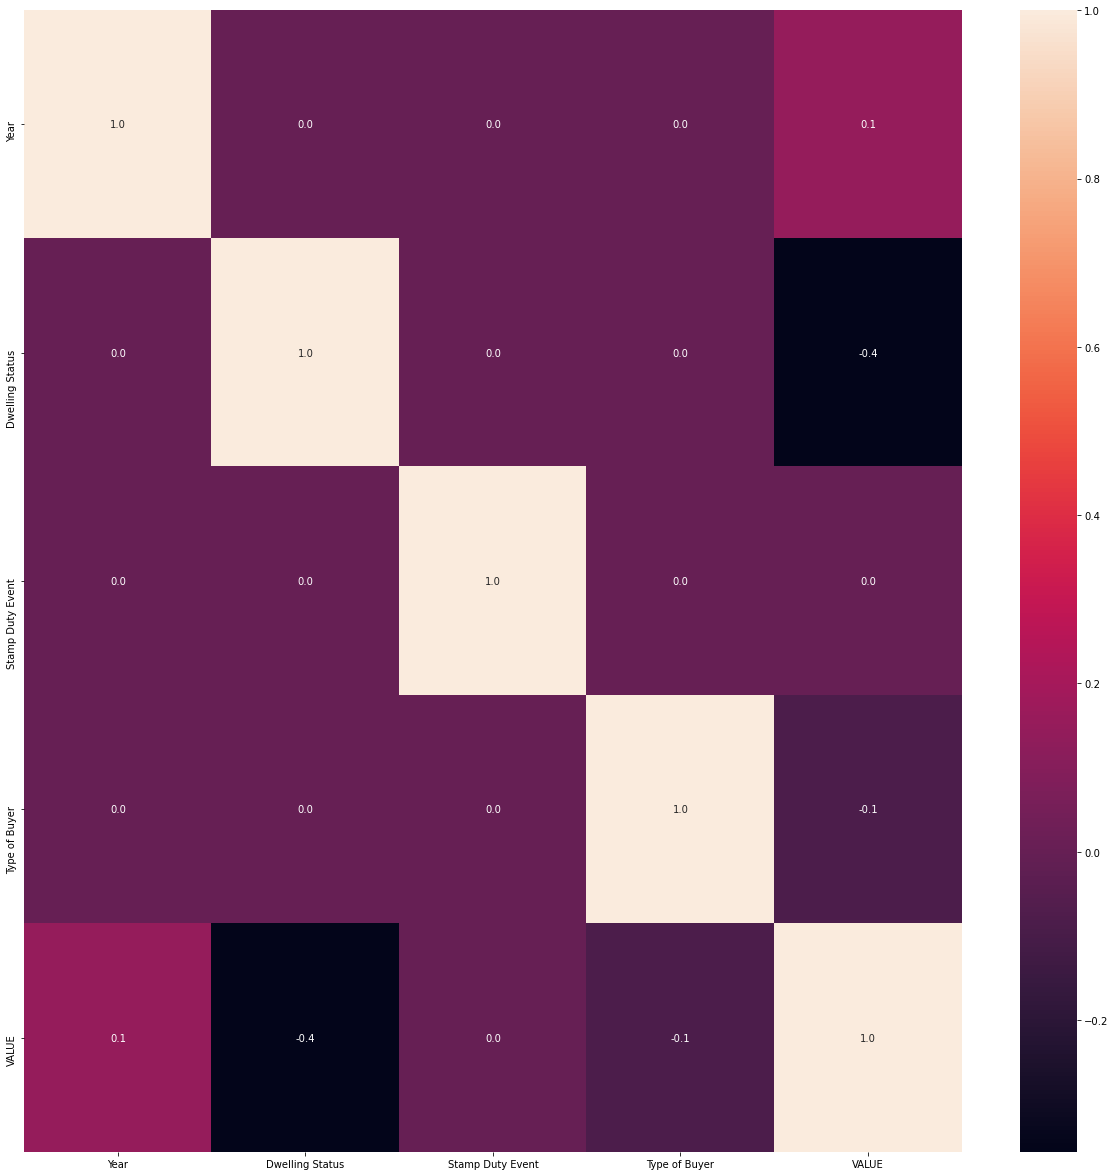

In [16]:
#You can also plot a heat map to understand how each feature correlates to the other (Do they go hand in hand or are they inversely propotional)

f= plt.subplots(figsize=(21,21))
sns.heatmap(data.corr(),annot=True,fmt='.1f',color='green')  #We can use a simple seaborn method to draw the heatmaps

In [17]:
# split the data into featutes and target variable seperately
X = data.iloc[:, [0]].values # features set
y = data.iloc[:, -1].values # set of study variable

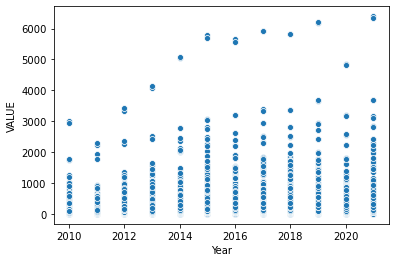

In [18]:
sns.scatterplot(x=data['Year'], y=data['VALUE'])

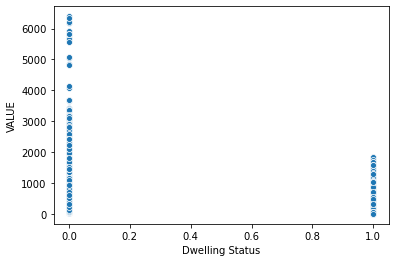

In [19]:
sns.scatterplot(x=data['Dwelling Status'], y=data['VALUE'])

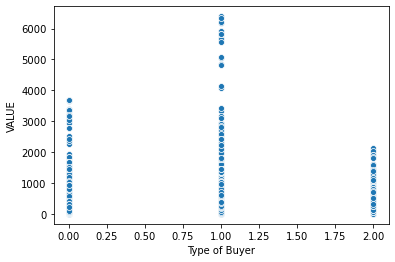

In [20]:
sns.scatterplot(x=data['Type of Buyer'], y=data['VALUE'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
y = y.reshape(-1,1)

In [23]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Establish a model
model = SVR(C=1, cache_size=200, epsilon=1, kernel='rbf')

In [25]:
# Train the model
model.fit(X_train, y_train)

SVR(C=1, epsilon=1)

In [26]:
# Score the model
model.score(X_test, y_test)

-0.0832516524777227